## Patient Records

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
patient_records = pd.read_csv('patient_records.csv')

# Display the first few rows of the dataset
patient_records.head()

,Unnamed: 0,Patient ID,Surgery Type,Age,Gender,Days since last visit,Outcome
0,0,1,PK,82,Male,23,Pass
1,1,2,PK,46,Female,157,Fail
2,2,3,DALK,30,Male,27,Pass
3,3,4,THPK,78,Male,180,Pass
4,4,5,PK,40,Male,222,Not determined


In [2]:
# Check for missing values
print(patient_records.isnull().sum())

# Handle missing values (example: dropping rows with missing values)
patient_records_cleaned = patient_records.dropna()
# Setting index to Patient ID and dropping the first row
patient_records_cleaned.drop('Unnamed: 0', axis = 1, inplace=True)
patient_records_cleaned.set_index('Patient ID', inplace = True)


Unnamed: 0               0
Patient ID               0
Surgery Type             0
Age                      0
Gender                   0
Days since last visit    0
Outcome                  0
dtype: int64


In [3]:
# Summary statistics for numerical columns
print(patient_records_cleaned.describe())

# Summary statistics for categorical columns
patient_records_cleaned.describe(include=['O'])

              Age  Days since last visit
count  500.000000             500.000000
mean    53.456000             177.404000
std     26.338784             103.517557
min      7.000000               0.000000
25%     32.000000              91.000000
50%     53.500000             179.000000
75%     76.000000             267.500000
max     99.000000             362.000000


,Surgery Type,Gender,Outcome
count,500,500,500
unique,4,2,3
top,EK,Male,Pass
freq,138,254,275


In [4]:
patient_records_cleaned['Outcome'].value_counts()

Outcome
Pass              275
Not determined    113
Fail              112
Name: count, dtype: int64

### Histogram and Box Plots

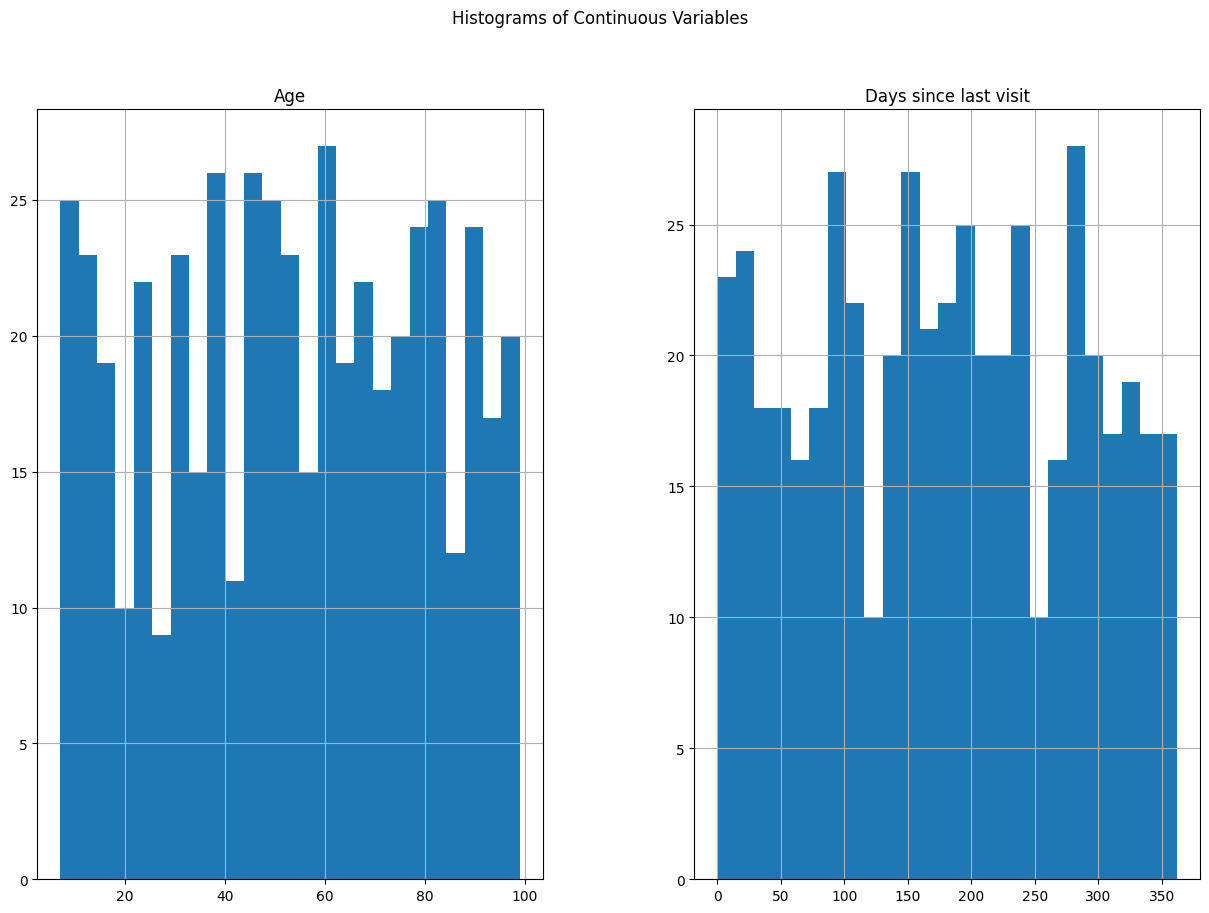

In [5]:
# Histograms
patient_records_cleaned.hist(bins=25, figsize=(15, 10))
plt.suptitle('Histograms of Continuous Variables')
plt.show()


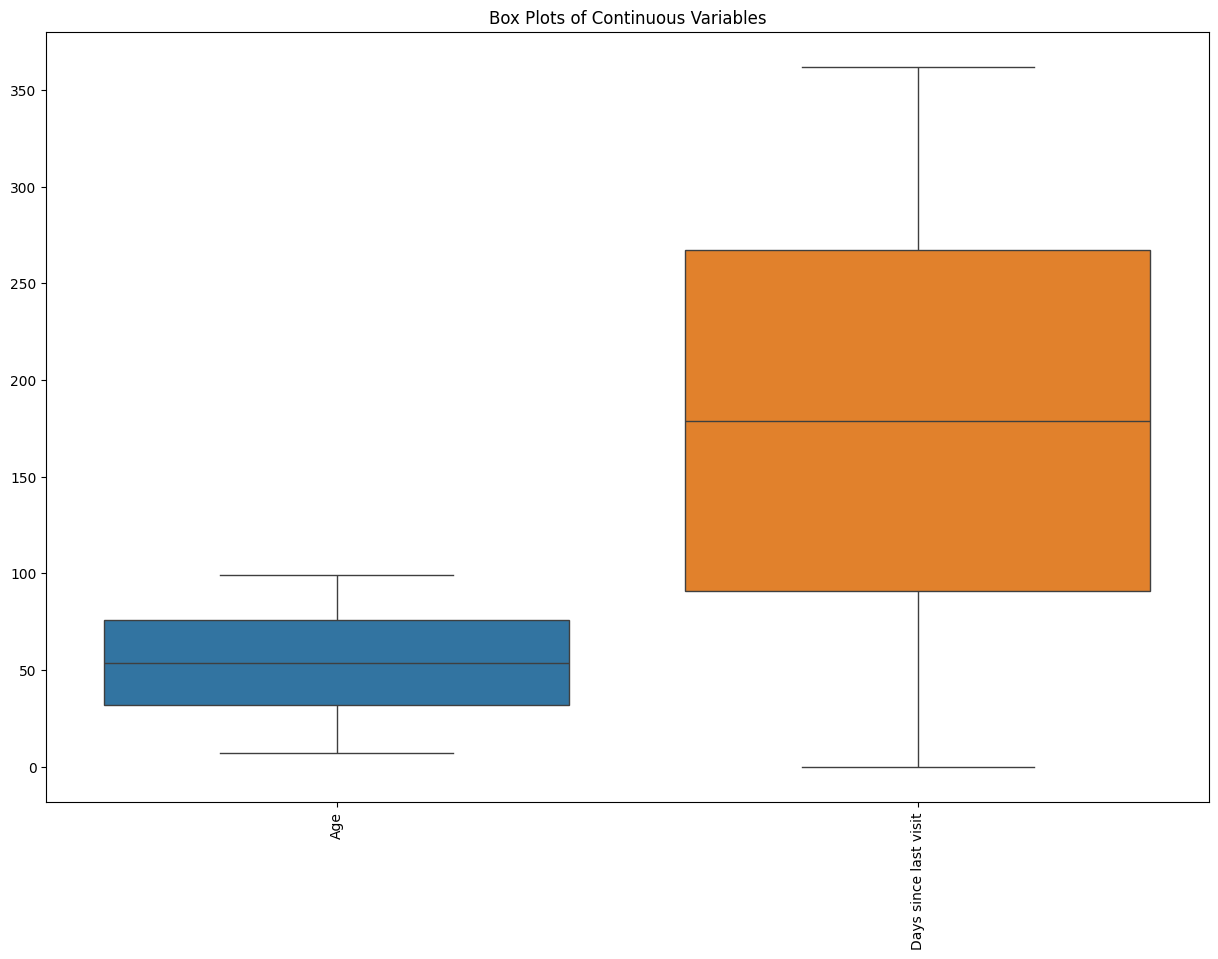

In [6]:
# Box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=patient_records_cleaned.select_dtypes(include=[np.number]))
plt.title('Box Plots of Continuous Variables')
plt.xticks(rotation=90)
plt.show()

In [7]:
# Z-score for outlier detection
from scipy.stats import zscore

# Calculate Z-scores for numerical features
z_scores = np.abs(zscore(patient_records_cleaned.select_dtypes(include=[np.number])))
# Identify outliers (Z-score > 3)
outliers = (z_scores > 3).any(axis=1)
print(f'Number of outliers detected: {outliers.sum()}')
print(patient_records_cleaned[outliers])

Number of outliers detected: 0
Empty DataFrame
Columns: [Surgery Type, Age, Gender, Days since last visit, Outcome]
Index: []


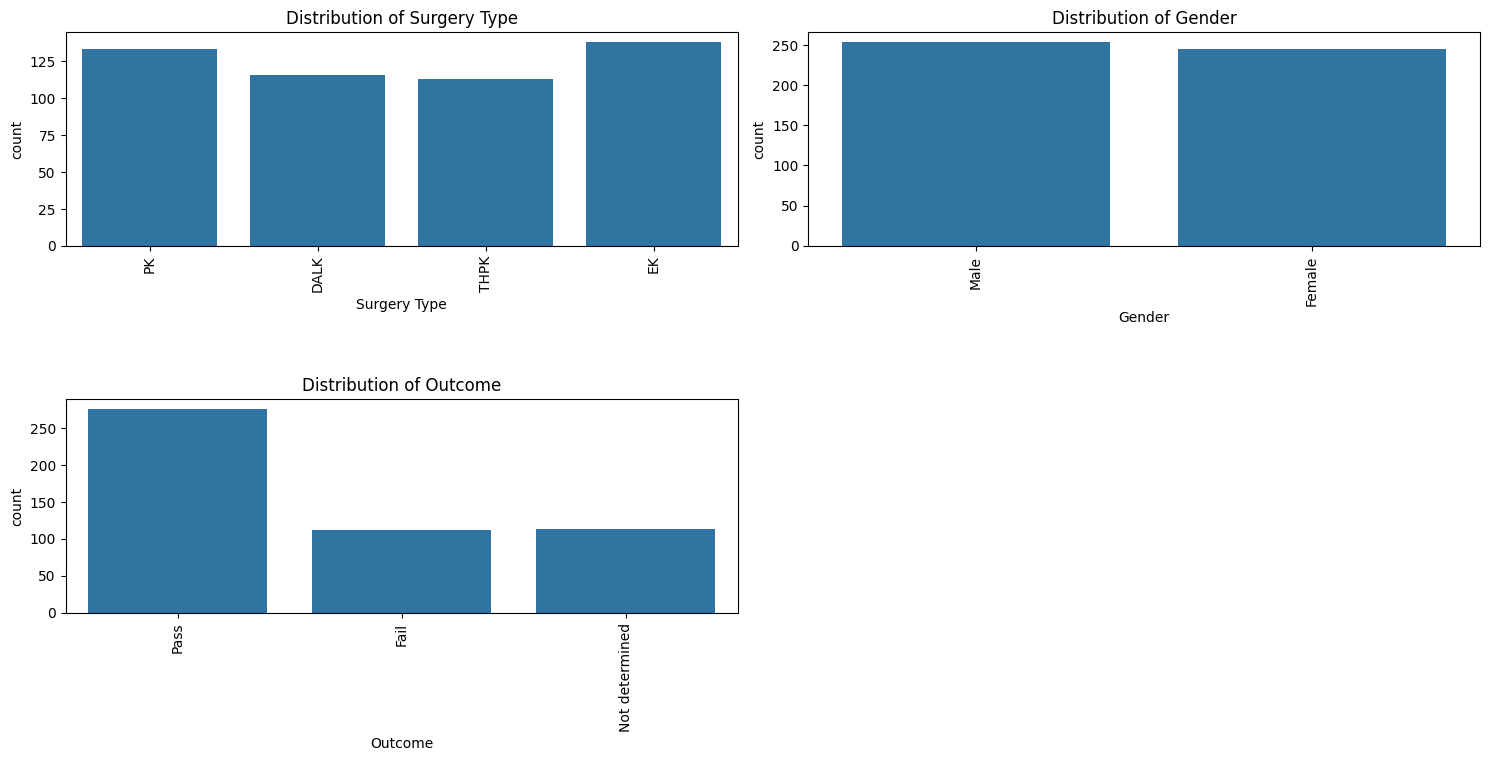

In [8]:
# Bar charts for categorical variables
categorical_vars = patient_records_cleaned.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 10))
for i, var in enumerate(categorical_vars, start=1):
    plt.subplot(3, 2, i)
    sns.countplot(x=var, data=patient_records_cleaned)
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

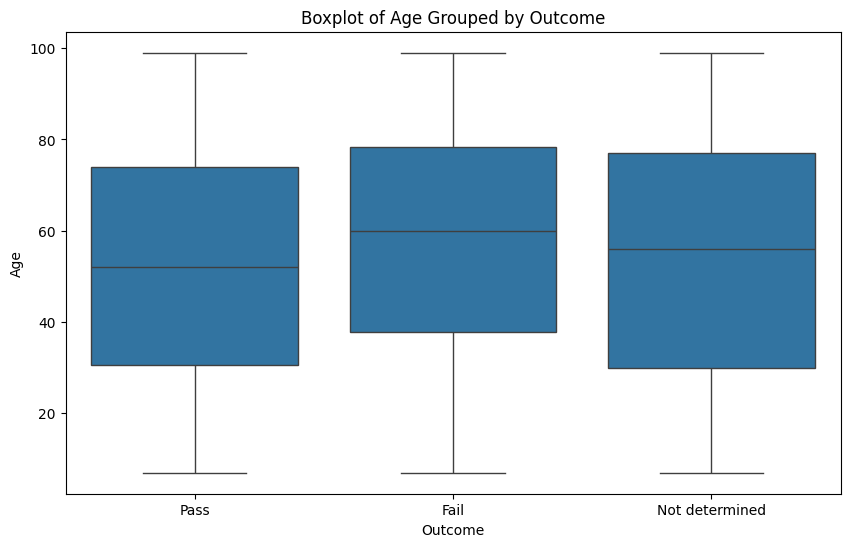

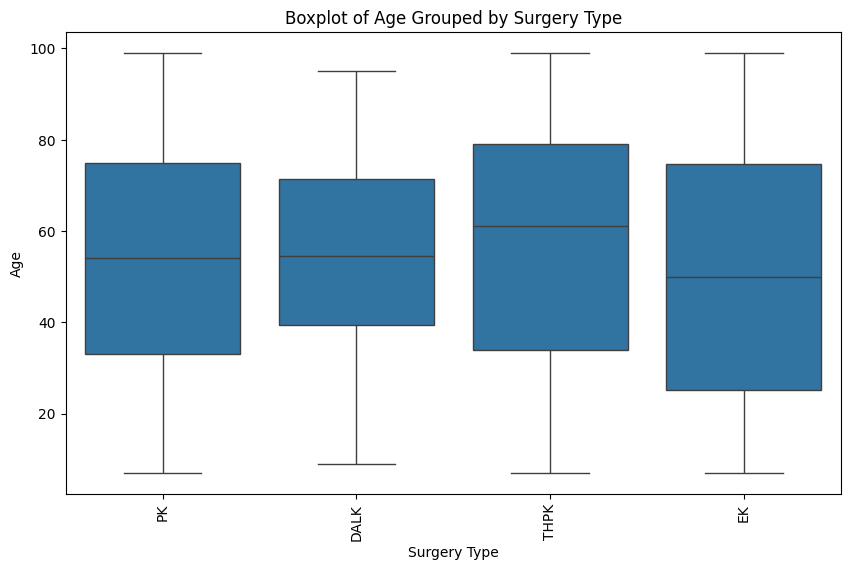

In [9]:
# Boxplot of Age grouped by Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Age', data=patient_records_cleaned)
plt.title('Boxplot of Age Grouped by Outcome')
plt.show()

# Boxplot of Age grouped by Surgery Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Surgery Type', y='Age', data=patient_records_cleaned)  
plt.title('Boxplot of Age Grouped by Surgery Type')
plt.xticks(rotation=90)
plt.show()

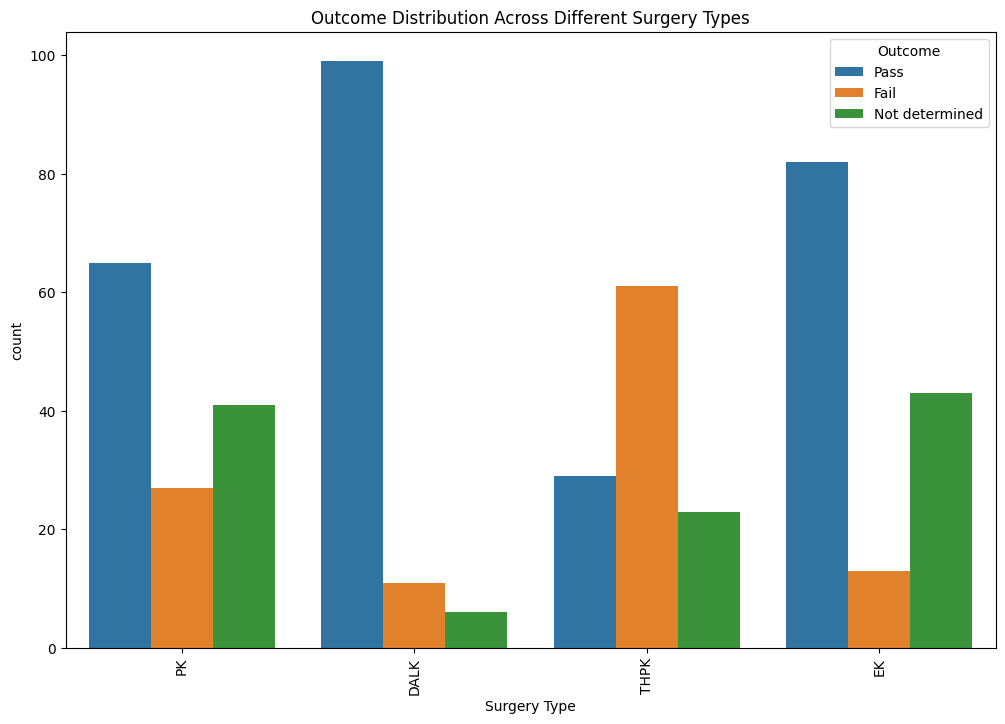

In [10]:
# Bar plot of Outcome distribution across Surgery Types
plt.figure(figsize=(12, 8))
sns.countplot(x='Surgery Type', hue='Outcome', data=patient_records_cleaned)
plt.title('Outcome Distribution Across Different Surgery Types')
plt.xticks(rotation=90)
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['Gender', 'Outcome', 'Surgery Type']  # Add other categorical columns as needed

# Apply Label Encoding
for col in categorical_columns:
    patient_records_cleaned[col] = label_encoder.fit_transform(patient_records_cleaned[col])

patient_records_cleaned.head()

,Surgery Type,Age,Gender,Days since last visit,Outcome
Patient ID,,,,,
1,2,82,1,23,2
2,2,46,0,157,0
3,0,30,1,27,2
4,3,78,1,180,2
5,2,40,1,222,1


In [12]:
# Correlation matrix
correlation_matrix = patient_records_cleaned.corr()
correlation_matrix

,Surgery Type,Age,Gender,Days since last visit,Outcome
Surgery Type,1.000000,0.039225,0.005765,0.019377,-0.437992
Age,0.039225,1.000000,0.040013,0.020676,-0.068213
Gender,0.005765,0.040013,1.000000,-0.002461,0.005855
Days since last visit,0.019377,0.020676,-0.002461,1.000000,0.066935
Outcome,-0.437992,-0.068213,0.005855,0.066935,1.000000


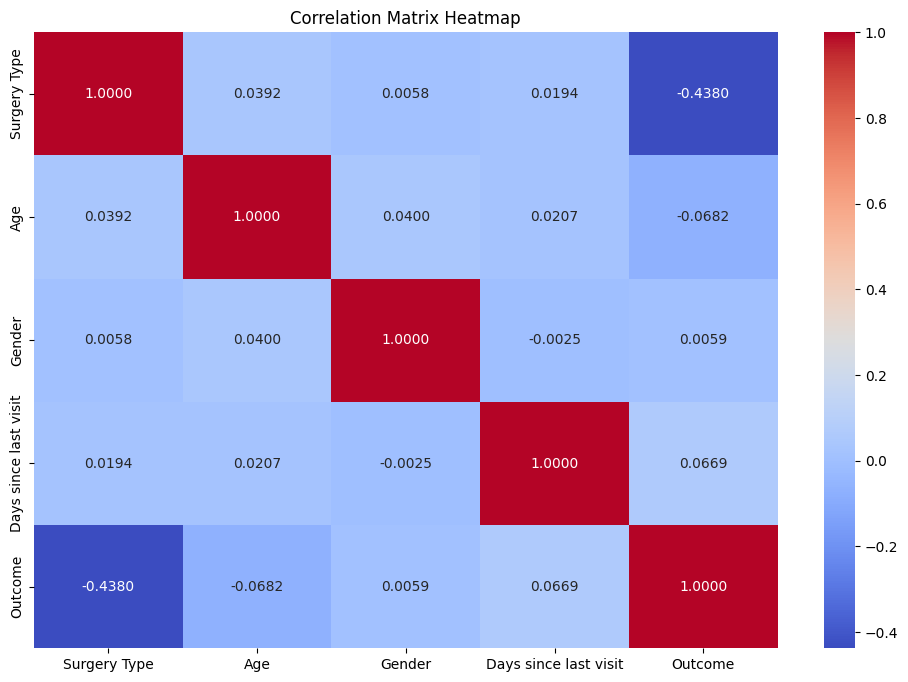

In [13]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Doctor Notes

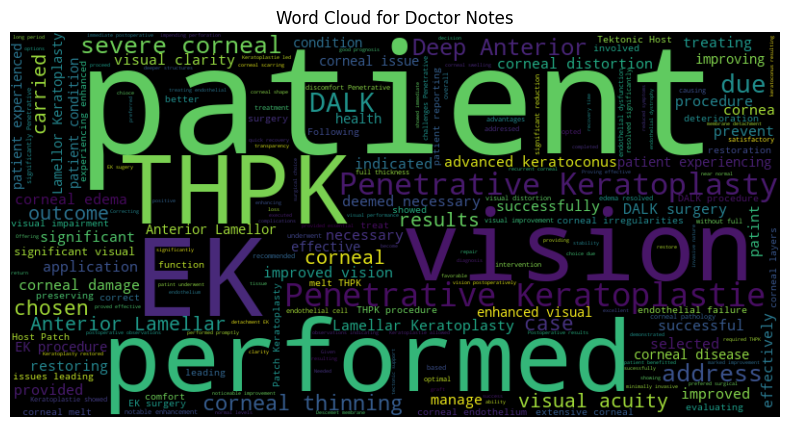

In [14]:
# Load the doctor notes dataset
doctor_notes = pd.read_csv('doctor_notes.csv')

# Word Cloud for Doctor Notes
from wordcloud import WordCloud

# Combine all doctor notes into a single string
text = ' '.join(doctor_notes['Doctor Notes'].astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Doctor Notes')
plt.show()

## Insights
### Patient Records:
1. Conducted various EDA techniques like box plot, histogram and correlation matrix among others for indepth analysis.
2. In the Outcomes it can be seen that 'Not determined' outcomes are almost 22% of the total dataset.
3. From the box plots of continous variables it could be seen that there are no outliers present in the dataset.
4. Dataset doesn't contain any null values for all the features
5. Outcome Distribution Across Different Surgery Types graph shows that 'THPK' is the one with the most failure outcomes and 'DALK' with the most successful outcomes
6. From the correlation matrix it could be seen that outcome is most negatively related to 'surgery type' and most positively related to 'Day last visited'.

### Doctor Notes:
1. Since, the dataset doesn't contain much input except from doctor notes. Therefore, created a word cloud to get most repeating words.
2. It can be observed from the word cloud that 'THPK' and 'EK' are the surgery types which they are mentioning the most.